In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# load the data from csv to pandas dataframe
Healthcare_Provider_raw = pd.read_csv("data/Train-1542865627584.csv")
Healthcare_Beneficiary_raw = pd.read_csv("data/Train_Beneficiarydata-1542865627584.csv")
Healthcare_Inpatient_raw = pd.read_csv("data/Train_Inpatientdata-1542865627584.csv")
Healthcare_Outpatient_raw = pd.read_csv("data/Train_Outpatientdata-1542865627584.csv")

In [3]:
# Assign inpatient data as 1, outpatient data as 0

Healthcare_Inpatient_raw['In_Out']=1
Healthcare_Outpatient_raw['In_Out']=0

In [4]:
# union/concat the inpatient and outpatient data with provider and patient info
concat_df=pd.concat([Healthcare_Inpatient_raw,Healthcare_Outpatient_raw],axis=0)


merge_bene_df=concat_df.merge(Healthcare_Beneficiary_raw, on='BeneID', how='left')

merge_provider_df=merge_bene_df.merge(Healthcare_Provider_raw, on = 'Provider', how ='left')
merge_provider_df.drop_duplicates(inplace=True)
merge_provider_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,1,2,2,1,2,0,0,5470,1870,No


In [5]:
# DeductibleAmtPaid	557312	899	17	Yang				Yes	Yes	Mean,Max
# NoOfMonths_PartACov	558211	0	13	Yang						Mean
# NoOfMonths_PartBCov	558211	0	13	Yang						Mean
# OPAnnualReimbursementAmt	558211	0	2078	Yang						Mean,Max,Sum
# OPAnnualDeductibleAmt	558211	0	789	Yang						Mean,Max,Sum

In [6]:
agg_ys_list=['Provider','DeductibleAmtPaid','NoOfMonths_PartACov',
             'NoOfMonths_PartBCov','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']
merge_provider_df[agg_ys_list].head()

,Provider,DeductibleAmtPaid,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV55912,1068.0,12,12,60,70
1,PRV55907,1068.0,12,12,60,70
2,PRV56046,1068.0,12,12,60,70
3,PRV52405,1068.0,12,12,250,320
4,PRV56614,1068.0,12,12,120,100


In [7]:
df_ys_grouped=merge_provider_df.groupby('Provider').agg({'DeductibleAmtPaid':['mean','max'],
                                                         'NoOfMonths_PartACov':'mean',
                                                         'NoOfMonths_PartBCov':'mean',
                                                         'OPAnnualReimbursementAmt':['mean','max','sum'],
                                                         'OPAnnualDeductibleAmt':['mean','max','sum']
                                                        })
df_ys_grouped

DeductibleAmtPaid         NoOfMonths_PartACov NoOfMonths_PartBCov  \
                      mean     max                mean                mean   
Provider                                                                     
PRV51001        213.600000  1068.0           12.000000           12.000000   
PRV51003        502.166667  1068.0           11.818182           11.871212   
PRV51004          2.080537   100.0           11.865772           11.959732   
PRV51005          3.175966   200.0           11.907296           11.939914   
PRV51007         45.333333  1068.0           11.833333           11.833333   
...                    ...     ...                 ...                 ...   
PRV57759          4.642857    90.0           12.000000           12.000000   
PRV57760          0.000000     0.0           12.000000           11.727273   
PRV57761          4.512195    90.0           12.000000           12.000000   
PRV57762          0.000000     0.0           12.000000           12.000000   
PRV57763          3.305085   100.0           12.000000           12.000000   

         OPAnnualReimbursementAmt                 OPAnnualDeductibleAmt        \
                             mean    max      sum                  mean   max   
Provider                                                                        
PRV51001              2615.200000  13460    65380            463.920000  2700   
PRV51003              2678.181818  31880   353520            737.121212  9950   
PRV51004              2194.899329  20900   327040            622.751678  7410   
PRV51005              2109.733906  97510  2457840            636.328755  6330   
PRV51007              1729.722222   6060   124540            469.722222  1970   
...                           ...    ...      ...                   ...   ...   
PRV57759              3241.785714  14650    90770            886.785714  2810   
PRV57760              1492.727273   4980    32840            805.454545  2930   
PRV57761              2928.414634  25090   240130            707.317073  4940   
PRV57762              2540.000000   2540     2540            400.000000   400   
PRV57763              3108.898305  30430   366850            803.305085  5860   

                  
             sum  
Provider          
PRV51001   11598  
PRV51003   97300  
PRV51004   92790  
PRV51005  741323  
PRV51007   33820  
...          ...  
PRV57759   24830  
PRV57760   17720  
PRV57761   58000  
PRV57762     400  
PRV57763   94790  

[5410 rows x 10 columns]

In [8]:
provider_ys_df=Healthcare_Provider_raw.copy()

for group_colnam in df_ys_grouped.columns:
    provider_ys_df[group_colnam[0]+'_'+group_colnam[1]]=df_ys_grouped[group_colnam].values
    
provider_ys_df

,Provider,PotentialFraud,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum
0,PRV51001,No,213.600000,1068.0,12.000000,12.000000,2615.200000,13460,65380,463.920000,2700,11598
1,PRV51003,Yes,502.166667,1068.0,11.818182,11.871212,2678.181818,31880,353520,737.121212,9950,97300
2,PRV51004,No,2.080537,100.0,11.865772,11.959732,2194.899329,20900,327040,622.751678,7410,92790
3,PRV51005,Yes,3.175966,200.0,11.907296,11.939914,2109.733906,97510,2457840,636.328755,6330,741323
4,PRV51007,No,45.333333,1068.0,11.833333,11.833333,1729.722222,6060,124540,469.722222,1970,33820
...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,No,4.642857,90.0,12.000000,12.000000,3241.785714,14650,90770,886.785714,2810,24830
5406,PRV57760,No,0.000000,0.0,12.000000,11.727273,1492.727273,4980,32840,805.454545,2930,17720
5407,PRV57761,No,4.512195,90.0,12.000000,12.000000,2928.414634,25090,240130,707.317073,4940,58000
5408,PRV57762,No,0.000000,0.0,12.000000,12.000000,2540.000000,2540,2540,400.000000,400,400


In [9]:
# provider_ys_df.to_csv('output/provider_ys_agg.csv',index=False)
print("uncomment the above code to output to csv")

uncomment the above code to output to csv


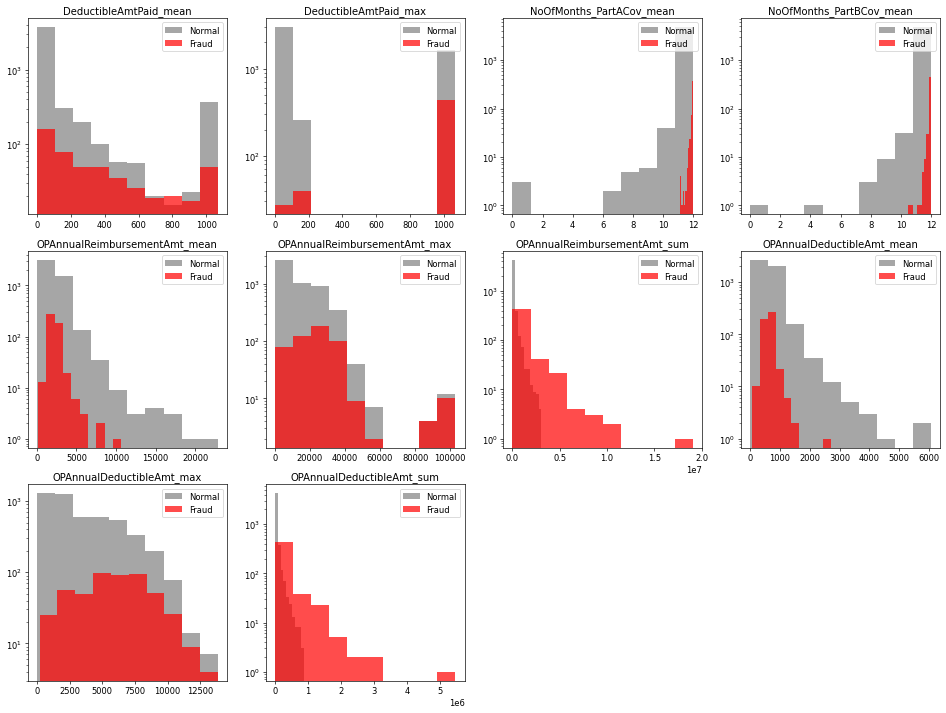

In [10]:
# log y hist

fig = plt.figure(figsize=(16,12),dpi=60)

for i in range(2,len(provider_ys_df.columns)):
# for i in range(len(provider_ys_df[num_col_list].columns)):
    plt.subplot(3,4,i-1)
    plt.hist(provider_ys_df.loc[provider_ys_df['PotentialFraud']=='No'].iloc[:,i:i+1].dropna().values,
             alpha=0.7,color='gray',label='Normal')
    plt.hist(provider_ys_df.loc[provider_ys_df['PotentialFraud']=='Yes'].iloc[:,i:i+1].dropna().values,
             alpha=0.7,color='red',label='Fraud')
    plt.title(provider_ys_df.columns[i])
    plt.yscale('log')
    plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

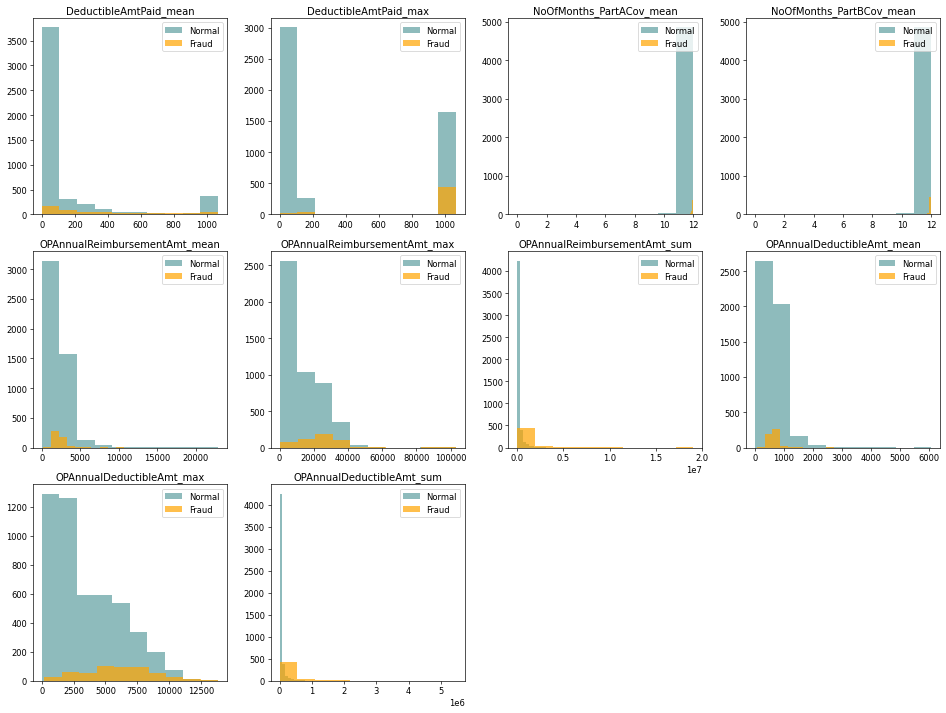

In [11]:
fig = plt.figure(figsize=(16,12),dpi=60)

for i in range(2,len(provider_ys_df.columns)):
# for i in range(len(provider_ys_df[num_col_list].columns)):
    plt.subplot(3,4,i-1)
    plt.hist(provider_ys_df.loc[provider_ys_df['PotentialFraud']=='No'].iloc[:,i:i+1].dropna().values,
             alpha=0.7,color='cadetblue',label='Normal')
    plt.hist(provider_ys_df.loc[provider_ys_df['PotentialFraud']=='Yes'].iloc[:,i:i+1].dropna().values,
             alpha=0.7,color='orange',label='Fraud')
    plt.title(provider_ys_df.columns[i])
    plt.legend(loc="upper right")
plt.tight_layout()
plt.show()